# Parametric vs Non-Parametric Lab

## Menu Change - Customer Satisfaction Analysis

As a junior data analyst at a consumer research firm, you've been tasked with analyzing customer feedback data from a major restaurant chain's menu redesign initiative. The restaurant has implemented new menu items in select locations and needs to understand their impact.

You'll be working with two key datasets:
1. Customer satisfaction ratings (1-5 scale) before and after the menu change
2. Customer return visit data comparing locations with and without the new menu

Using our four-step process, you'll need to determine whether the menu changes have made a significant impact on customer satisfaction and return rates, at an alpha of 0.05.
- Assessment
- Selection
- Implementation
- Interpretation

## Data Overview

Data Files: ratings.csv & return_visits.csv

Ratings Columns:
- customer_id: unique identifier
- before: rating before change
- after: rating after change

Return Visits Columns:
- customer_id: unique identifier
- location: New Menu or Old Menu
- returned: binary - if customer returned


First, let's import the libraries you'll need for our analysis and also load in the data


In [1]:
# CodeGrade step0
# Import Required Libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load in both datasets - you will need to have downloaded provided files and placed in same location
df_ratings = pd.read_csv('ratings.csv')
df_return = pd.read_csv('return_visits.csv')

In [2]:
df_ratings.head()

,customer_id,before,after
0,0,3,4
1,1,5,4
2,2,4,2
3,3,3,3
4,4,2,2


In [3]:
df_return.tail()

,customer_id,location,returned
145,145,Old Menu,1
146,146,Old Menu,0
147,147,Old Menu,1
148,148,Old Menu,0
149,149,Old Menu,1


### Part 1: Assessment Phase

The Assessment Phase is crucial for understanding your data before jumping into analysis. Think of it as getting to know
your data's personality. During this phase, you'll:
- Examine how your data is distributed (Are satisfaction scores clustered around certain values?)
- Check your sample sizes (Do you have enough data to make reliable conclusions?)
- Look for unusual patterns or outliers (Are there any suspicious ratings that might skew your results?)
- Create visualizations to better understand your data
- Check data against your assumptions

This foundational work will help you make informed decisions about which statistical tests to use later.

### Ratings Data

In [4]:
# CodeGrade step1
# Describe the basic stats of the ratings data
ratings_describe = df_ratings.describe()
sample_size_ratings = len(df_ratings)

In [5]:
# Run this cell without changes to display results
print(ratings_describe)
print(f"There are a total of {sample_size_ratings} customers in the paired ratings data, each with a score before the menu change and after")

       customer_id     before      after
count    75.000000  75.000000  75.000000
mean     37.000000   2.973333   3.453333
std      21.794495   1.229956   1.130574
min       0.000000   1.000000   1.000000
25%      18.500000   2.000000   3.000000
50%      37.000000   3.000000   4.000000
75%      55.500000   4.000000   4.000000
max      74.000000   5.000000   5.000000
There are a total of 75 customers in the paired ratings data, each with a score before the menu change and after


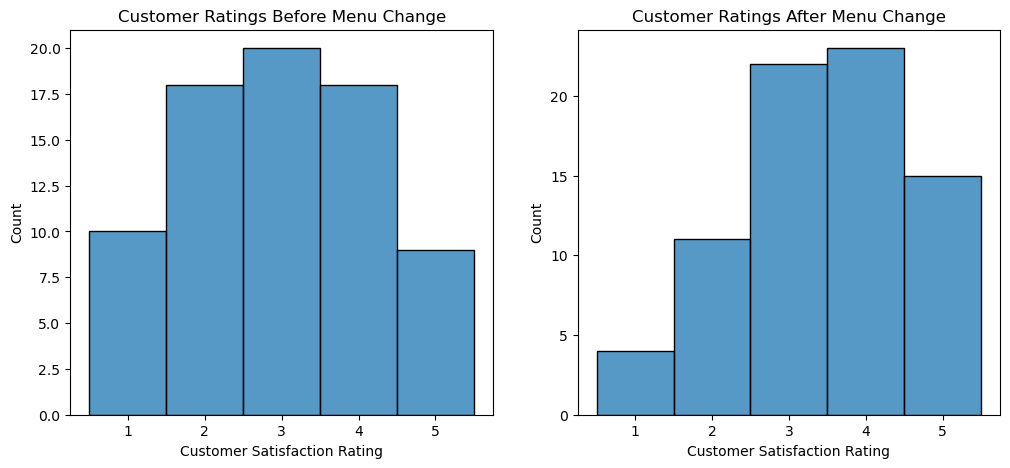

In [6]:
# CodeGrade step2
# Create a histogram to visually represent before and after rating ASKING ME ONE HSTOGRAM but it is too ugly
# Create pandas series

ratings_before = pd.Series(df_ratings['before'], index=None, dtype=None, name='Before')
ratings_after = pd.Series(df_ratings['after'], index=None, dtype=None, name='After')
ratings_both = [ratings_before, ratings_after] # This is not needed 

# Seaborn histplot - set these parameter values (discrete=True, multiple='layer')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
hist_ratings = sns.histplot(ratings_before, ax=ax1, bins=10, discrete=True, multiple='layer')

# sns.histplot(ratings_before, ax=ax1, bins=10, discrete=True, multiple='layer')
ax1.set_title('Customer Ratings Before Menu Change')
ax1.set_xlabel('Customer Satisfaction Rating')

sns.histplot(ratings_after, ax=ax2, bins=10, discrete=True, multiple='layer')
ax2.set_title('Customer Ratings After Menu Change')
ax2.set_xlabel('Customer Satisfaction Rating')

# Labels
#plt.xlabel('Customer Satisfaction Rating')
#plt.title('Distribution of Ratings Before and After Menu Change')

plt.show()

#### Visualy, there is a clear skew of the normal distribution after the new menu toward better ratings

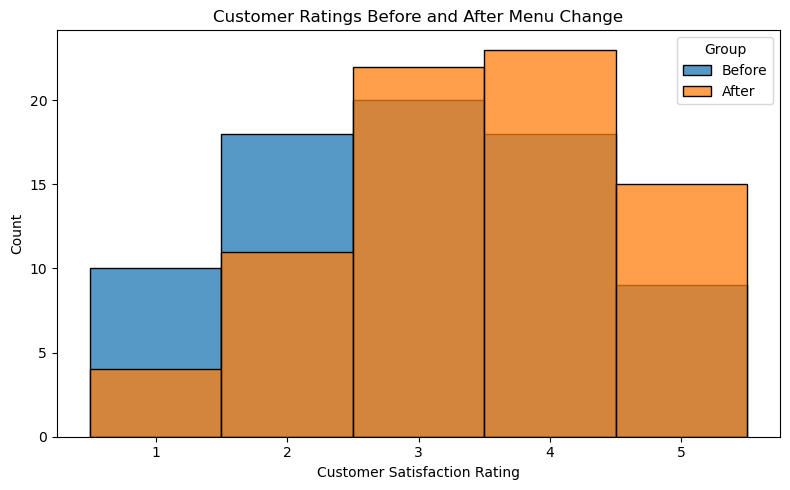

In [7]:
# TOO UGLY !!!
fig, ax = plt.subplots(figsize=(8, 5))

sns.histplot(ratings_before, label='Before', ax=ax, bins=10, discrete=True, multiple='layer')
sns.histplot(ratings_after, label='After', ax=ax, bins=10, discrete=True, multiple='layer')

# Labels & legend
ax.set_xlabel('Customer Satisfaction Rating')
ax.set_ylabel('Count')
ax.set_title('Customer Ratings Before and After Menu Change')
ax.legend(title='Group')

# Save plot to variable if required
hist_ratings = fig

plt.tight_layout()
plt.show()


### Return Visits Data

In [8]:
# CodeGrade step3
# Describe the basic stats of the location column
return_describe = df_return.describe()

# Seperate out New Menu and Old Menu samples - use pandas to create two dataframes
new_menu = df_return[df_return['location'] == 'New Menu']
old_menu = df_return[df_return['location'] == 'Old Menu']

# Counts for returned or not (binary column) - use built-in pandas method - return percentage (normalize=True)
new_return_counts = new_menu['returned'].value_counts(normalize=True)
old_return_counts = old_menu['returned'].value_counts(normalize=True)

In [9]:
# Run this cell without changes to display results
print(return_describe)
print(new_return_counts, old_return_counts)

       customer_id    returned
count   150.000000  150.000000
mean     74.500000    0.613333
std      43.445368    0.488618
min       0.000000    0.000000
25%      37.250000    0.000000
50%      74.500000    1.000000
75%     111.750000    1.000000
max     149.000000    1.000000
returned
1    0.746667
0    0.253333
Name: proportion, dtype: float64 returned
0    0.52
1    0.48
Name: proportion, dtype: float64


Text(0, 0.5, 'Return Rates')

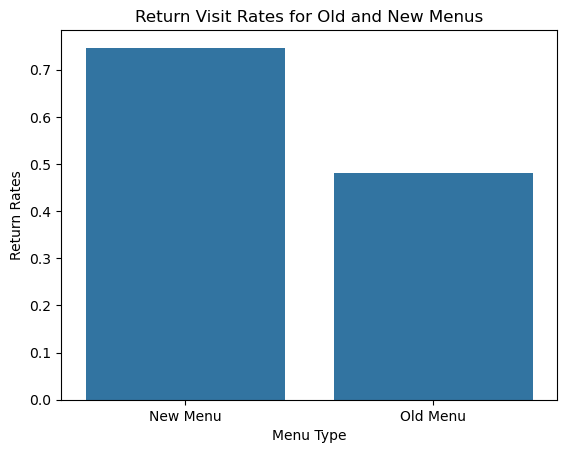

In [10]:
# CodeGrade step4
# Calculate return visits rates - you can use counts object above
new_return_rate = new_return_counts[1]
old_return_rate = old_return_counts[1]

# Barplot showing return visit rates comparing new and old menu
bar_return = sns.barplot(y=[new_return_rate, old_return_rate], x=['New Menu', 'Old Menu'])

# Labels
plt.title('Return Visit Rates for Old and New Menus')
plt.xlabel('Menu Type')
plt.ylabel('Return Rates')

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Meeting Expectations check list.
Examine both datasets for:

Distribution characteristics:
Histograms and descriptive statistics were used to understand how ratings and return behavior are distributed across groups.

Sample sizes:
Computed total counts in both datasets to ensure adequate sample size for reliable analysis.

Potential outliers:
Visual inspection of histograms helped assess the presence of outliers in satisfaction ratings, which are just 1-5. 
Return data is binary and no 100% - 0% distribution, so no outliers

Create appropriate visualizations:
Side-by-side histograms and return rate summaries were created to compare groups clearly and intuitively.

### Assumption Checking
**For the Ratings Data (Before vs After):**

- We have paired measurements from the same customers before and after the menu change

Key assumption to check:
- Normality of differences (using Shapiro-Wilk Test)
- Equal Variances Between Samples (using Levene Test)

**For the Return Visits Data:**

This is a between-groups design comparing return rate between two independent groups (New Menu vs Old Menu)

Key assumptions checked for Chi-square test:
- Independent observations (we can assume this given different locations)
- Minimum expected frequencies - use [scipy.stats.contingency.expected_freq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.contingency.expected_freq.html#scipy.stats.contingency.expected_freq)

In [11]:
# CodeGrade step5
# Ratings Data (Before vs After)
# Calculate differences
differences = ratings_after - ratings_before

# Shapiro-Wilk test for normality
shapiro_stat, shapiro_p = stats.shapiro(differences)

# Levene test for equal variance - will tell us if distribution changed after menu change
levene_stat, levene_p = stats.levene(ratings_before, ratings_after)

# Return Visits Data
# Create contingency table
contingency = pd.crosstab(df_return['location'], df_return['returned'])

expected_freq = stats.contingency.expected_freq(contingency.to_numpy())

In [12]:
# Run this cell without changes to display results
print("Checking normality of differences (Shapiro-Wilk test):")
print(f"Statistic: {shapiro_stat:.4f}, p-value: {shapiro_p:.4f}")
print("Levene's test for homogeneity of variances:")
print(f"Statistic: {levene_stat:.4f}, p-value: {levene_p:.4f}")
print("\nContingency table for return visits:")
print(contingency)
print(expected_freq)

Checking normality of differences (Shapiro-Wilk test):
Statistic: 0.9560, p-value: 0.0109
Levene's test for homogeneity of variances:
Statistic: 0.1000, p-value: 0.7522

Contingency table for return visits:
returned   0   1
location        
New Menu  19  56
Old Menu  39  36
[[29. 46.]
 [29. 46.]]


<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Meeting/Exceed expectations check list.

Normality (Paired Differences):Shapiro-Wilk test returned p = 0.0109, indicating the differences are not normally distributed. So, normality assumption not met.

Equal Variances: Levene’s test returned p = 0.7522, suggesting equal variances between before and after ratings, so assumption met.

Chi-square Assumptions: Groups are independent!!! All expected cell frequencies (29 or 46) ≥ 5, so assumptions met.

### Part 2: Selection Phase

Now that you understand your data, it's time to choose appropriate statistical tests. This phase is like selecting the
right tool for the job. Your choice will depend on:
- The distribution and type of your data (normal vs non-normal)
- The type of comparison you're making (before/after, between groups)
- The general assumptions you can reasonably make about your data
- The statistical test assumptions you checked

Select the appropriate statistical test for each analysis based on the information above. Choose from one of the options below - make sure to match the correct string name when you assign to variable.
- Paried t-test
- 2 Sample Independent t-test
- Goodness of Fit test
- Test of Independence
- Test of Homogeneity
- Fisher's Exact test
- Mann-Whitney U test
- Wilcoxon signed-rank test

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Step 1: Rating Data before vs after new menu

We have the same group of customers , therefor it's paired

The data type is categorical 1-5 intervals

According to Shapiro, the normality was not met

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Step 2: Return Visits

We have two independent groups of customers acording to the set up of the experiment (new menu and old menu) 

The data type is binary 0-1

All expected cell frequencies (29 or 46) ≥ 5 and independent groups, so chi Squared assumption is met

In [13]:
# CodeGrade step6
# Document your chosen tests
# Name of chosen test for ratings analysis - as a string
selected_test_ratings = "Wilcoxon signed-rank test"

# Name of chosen test for return visits analysis - as a string
selected_test_returns = "Test of Homogeneity"

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Meeting/Exceed expectations check list.

Based on your assessment:

Choose appropriate statistical tests for each analysis

Justify your choices

Document any assumptions you're making

Selected the Wilcoxon signed-rank test for the ratings data, as it involves paired observations and the normality assumption was violated. Selected the Chi-square Test of Independence for the return visits data, comparing two independent groups with binary outcomes and expected frequencies ≥ 5. Assumptions of independence, data type suitability, and distribution were evaluated and documented using descriptive statistics, visualizations, and statistical tests (Shapiro-Wilk, Levene’s, expected frequencies). Test choices align with the structure of the data and the assumptions checked during analysis.

### Part 3: Implementation Phase

This is where you put your plan into action. You'll implement your chosen statistical tests, create clear visualizations of your results, and calculate effect sizes to understand the practical significance of any differences you find.

### Statisical Tests

In [14]:
# CodeGrade step7
# Test 1: Comparing Before and After Ratings
# Using appropriate test
stat_ratings, p_value_ratings = stats.wilcoxon(ratings_before, ratings_after)

In [15]:
# Run this code without changes to display result
print("\nBefore and After Ratings test results:")
print(f"Statistic: {stat_ratings:.4f}, p-value: {p_value_ratings:.4f}")


Before and After Ratings test results:
Statistic: 642.0000, p-value: 0.0268


In [16]:
# CodeGrade step8
# Test 2: Comparing Return Visits Between Menu Types
# Using appropriate test
stat_return, p_value_return, _, _ = stats.chi2_contingency(contingency)

In [17]:
# Run this code without changes to display result
print("\nReturn Visits test results:")
print(f"Statistic: {stat_return:.4f}, p-value: {p_value_return:.4f}")


Return Visits test results:
Statistic: 10.1481, p-value: 0.0014


<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Meeting/Exceed expectations check list.

Implement your chosen tests: (Implemented the appropriate statistical tests for both analyses) Wilcoxon signed-rank test for before/after satisfaction ratings and Chi-square test of independence for return visits across menu types

Determine significance based on test results: Both tests were executed correctly, and p-values were used to determine statistical significance based on an alpha level of 0.05. it was met all requirements


TEST 1: p = 0.0268 < 0.05, so we reject the null hypothesis.There is a statistically significant difference in customer satisfaction before and after the menu change and because it’s a non-parametric test, the median satisfaction rating changed.

TEST 2: Since p = 0.0014 < 0.05, so we reject the null hypothesis. There is a statistically significant association between menu type and customer return behavior and means customers exposed to the new menu were more likely to return than those who saw the old menu.

### Part 4: Interpretation Phase

### Effect Sizes

**For the Ratings Data:**

Calculate Cohen's d effect size for paired samples (before/after ratings).
    
For paired samples, we use the mean difference divided by the standard deviation of the differences, which accounts for the correlation between measurements.

**For the Return Visits Data:**

Calculate Cramer's V for categorical variables

Measures the strength of association between two categorical variables, in this case location (menu type) and customer return status, by calculating a value between 0 and 1, where 0 indicates no relationship and 1 indicates a perfect relationship, helping us understand whether the menu change had a meaningful impact on customer return behavior beyond just statistical significance.

Cramer's V for a 2x2 Contingency Table is calculated by dividing the Chi2 Statistic by the total sample size and then taking the square root.

In [18]:
# CodeGrade step9
# Calculates effect sizes for both analyses:
# Cohen's d for ratings (continuous, paired data)
differences = ratings_after - ratings_before
ratings_effect_size = differences.mean() / differences.std()

# Cramer's V for return visits (binary categorical data)
# Total sample size
n = contingency.to_numpy().sum()
returns_effect_size = (stat_return / n) ** 0.5

In [19]:
# Run this cell to display the results
print(f"Effect size for paired ratings analysis: {ratings_effect_size}")
print(f"Effect size for the return visits analysis: {returns_effect_size}")

Effect size for paired ratings analysis: 0.2718406974151428
Effect size for the return visits analysis: 0.2601031971418619


<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Meeting/Exceed expectations check list.

Calculate Cohen’s d effect size CHECKED

Calculate Cramer’s v effect size CHECKED

Ratings Analysis (Cohen’s d = 0.27): Indicates small to moderate effect size. The change in customer satisfaction after the menu update is statistically significant and shows some practical improvement, though the magnitude of change is modest.

Return Visits (Cramér’s V = 0.26): Represents small to moderate association between menu type and customer return behavior. The new menu appears to have impact on return rates, though not a very strong one.